In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [2]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'PINN': """
    [0.3483230307133258, 0.06655278697089981, 0.06823545906767987, 0.06370955409864532, 0.062005208792711014, 0.3229283988187904, 0.37678176609367614, 0.04274695510932498, 0.005700814827643679, 0.3141703466091914]
    Error h of residual active learning(LHS sampling): 1.671154e-01
    [0.14482204584243175, 0.025236943440228064, 0.023875915881075224, 0.02693932320995252, 0.020194138705335037, 0.1444462413262765, 0.1618543355846889, 0.01562858658216366, 0.0033156893519249954, 0.12738558184130988]
    MAE of fuhe active learning(LHS sampling): 6.936988e-02
    [0.09705432957736754, 0.003543096871902167, 0.003724523925688905, 0.0032468308516055305, 0.0030754373299206527, 0.08341862201447513, 0.11356128234609232, 0.0014617089403809935, 2.599706992089799e-05, 0.07895523225411608]
    MSE of fuhe active learning(LHS sampling): 3.880671e-02
    """,
    'Active': """
    [0.3502112523286583, 0.38267893501056666, 0.3887995426883514, 0.33952322495114223, 0.3986154003844785, 0.3915937091674398, 0.3855072727165366, 0.4189904428119439, 0.39052428564257763, 0.38639484880380875]
    Error h of residual active learning(LHS sampling): 3.832839e-01
    [0.13863952864490084, 0.14854946579514375, 0.14530225546973616, 0.1281299661243419, 0.14943107397623678, 0.16811132709813215, 0.16088347940638073, 0.16482779664449992, 0.1489955157366183, 0.17210215293721012]
    MAE of fuhe active learning(LHS sampling): 1.524973e-01
    [0.09810942374770944, 0.11714389129756136, 0.12092108181421933, 0.09221243870872915, 0.12710384253252788, 0.1226653622779067, 0.11888188541370719, 0.14042963487720986, 0.1219962907568776, 0.11942993311529812]
    MSE of fuhe active learning(LHS sampling): 1.178894e-01
    """,
    'Residual': """
    [0.08997458853811846, 0.005591935605120025, 0.005488657007448098, 0.004785955945103627, 0.006117341472211822, 0.005704255658595772, 0.005464109803422511, 0.005975972594739951, 0.5244815225497758, 0.006740778445776955]
    Error h of residual active learning(LHS sampling): 6.603251e-02
    [0.03940361614253336, 0.0029729445672727825, 0.003009454673870581, 0.002701805098158418, 0.0031210667018016633, 0.003256034470747703, 0.0029831283964109013, 0.0036262389949712334, 0.2627466780259119, 0.0036862166901687316]
    MAE of fuhe active learning(LHS sampling): 3.275072e-02
    [0.006475752942790921, 2.5013522566529493e-05, 2.4098095280139242e-05, 1.8322634832186085e-05, 2.9934773770660286e-05, 2.602846140460807e-05, 2.388302697789138e-05, 2.8567203427018367e-05, 0.22004470289700487, 3.63471730969822e-05]
    MSE of fuhe active learning(LHS sampling): 2.267327e-02
    """,
    'Fuhe': """
    [0.3258728496115629, 0.0055091096625621986, 0.005940434548017508, 0.00614217016256539, 0.0052632740173207, 0.005121984825615726, 0.0046814864261549745, 0.006137434173691797, 0.005990063086584065, 0.005661701108256739]
    Error h of residual active learning(LHS sampling): 3.763205e-02
    [0.14602222836464013, 0.0029026994216386774, 0.0032307166314276443, 0.003296912104969801, 0.0025943250152672074, 0.0026839277873001474, 0.002558330238180228, 0.003748523180409712, 0.0032581935385819437, 0.003191213954063513]
    MAE of fuhe active learning(LHS sampling): 1.734871e-02
    [0.08494677386184549, 2.4278025756405554e-05, 2.8228445536189862e-05, 3.017826174434779e-05, 2.215962949889115e-05, 2.098587627252555e-05, 1.7531459390454322e-05, 3.0131741115148227e-05, 2.8702077036266547e-05, 2.5641558011340274e-05]
    MSE of fuhe active learning(LHS sampling): 8.517461e-03
    """,
    'Fuhechaos': """
    [0.5539575314882895, 0.006553963516742972, 0.007962793113273721, 0.00583233999326283, 0.005745600064297757, 0.0061732193794414745, 0.006538004936319204, 0.004849730583872642, 0.08974963780135478, 0.004509600038301761]
    Error h of residual active learning(LHS sampling): 6.918724e-02
    [0.26864176204116097, 0.003528730457033902, 0.0041989197970471, 0.0034177267732714775, 0.003038559106897283, 0.003298951504730136, 0.003932406246500828, 0.00309470758372533, 0.04158855275838943, 0.002437785069808134]
    MAE of fuhe active learning(LHS sampling): 3.371781e-02
    [0.24547285610199554, 3.436042857206854e-05, 5.0720251388094005e-05, 2.72104797607458e-05, 2.6407136986054207e-05, 3.048414051585029e-05, 3.419330037052412e-05, 1.8814200115535308e-05, 0.006443412603212975, 1.6267716079498417e-05]
    MSE of fuhe active learning(LHS sampling): 2.521547e-02
    """,
    'Chaos': """
    [0.3860080581945858, 0.2837062301208643, 0.3930504216801735, 0.3675867492351406, 0.3624130231711545, 0.34156535131616966, 0.38274525976578855, 0.39820878382549274, 0.7481026534156746, 0.28963242905781517]
    Error h of residual active learning(LHS sampling): 3.953019e-01
    [0.1660426730232831, 0.1073001737146787, 0.14823886326557537, 0.14754558222145056, 0.13615857077637988, 0.13727381008992456, 0.15033035050342072, 0.1649988089185903, 0.3342743074055282, 0.12304352114773556]
    MAE of fuhe active learning(LHS sampling): 1.615207e-01
    [0.11919094827434214, 0.06438553057075527, 0.12357967995074456, 0.1080861949208171, 0.10506501431624365, 0.09332503278017397, 0.11718450086606243, 0.12684466455257284, 0.4476853917416011, 0.06710345880852758]
    MSE of fuhe active learning(LHS sampling): 1.372450e-01
    """,
    'Chaoschaos': """
    [0.3910553879856508, 0.049017904772934794, 0.3709901905544703, 0.40666943094615865, 0.3951197145299756, 0.4187970405521697, 0.3863171843177509, 0.3992175956605823, 0.3955097902119072, 0.3375045963272001]
    Error h of residual active learning(LHS sampling): 3.550199e-01
    [0.14596268250236752, 0.021151441780129714, 0.13563691438363026, 0.17756856359327233, 0.17484281762510662, 0.18277170100302667, 0.15804729398717446, 0.17263160246335707, 0.1578948614003464, 0.12853169171332118]
    MAE of fuhe active learning(LHS sampling): 1.455040e-01
    [0.12232833962694929, 0.0019220293739566532, 0.11009697486061368, 0.13229200210123543, 0.12488432528531658, 0.14030002265850813, 0.1193819276502646, 0.12748816862550535, 0.12513102714698301, 0.091119203837919]
    MSE of fuhe active learning(LHS sampling): 1.094944e-01
    """,
    '0.9Residual': """
    [0.48237266691741687, 0.005428429091638117, 0.004300287840745459, 0.00614217016256539, 0.0063135039951785375, 0.006881112143351808, 0.005762222500091389, 0.005959731905918133, 0.005990063086584065, 0.005534781000359113]
    Error h of residual active learning(LHS sampling): 5.346850e-02
    [0.22776997131356308, 0.0030563967684100156, 0.002303641840070178, 0.003296912104969801, 0.003213794527062787, 0.0035306114929344154, 0.003130459519488919, 0.0034742269332773707, 0.0032581935385819437, 0.0030334247980479865]
    MAE of fuhe active learning(LHS sampling): 2.560676e-02
    [0.1861298019060278, 2.3572132389987317e-05, 1.479263649698713e-05, 3.017826174434779e-05, 3.188536936630199e-05, 3.787632239296616e-05, 2.6560153517836284e-05, 2.841214226422074e-05, 2.8702077036266547e-05, 2.450481431086558e-05]
    MSE of fuhe active learning(LHS sampling): 1.863763e-02
    """,
    '0.9Residualchaos': """
    [0.006653251274873588, 0.005477471303677825, 0.005386917371006003, 0.00583233999326283, 0.0049525968836801795, 0.005421418800621299, 0.006538004936319204, 0.006562205784575142, 0.5685566533948988, 0.005822392172944028]
    Error h of residual active learning(LHS sampling): 6.212033e-02
    [0.0038903764915642278, 0.0029880136574344366, 0.0029687440120337917, 0.0034177267732714775, 0.002667092457139727, 0.002996654724453254, 0.003932406246500828, 0.0038199405616882926, 0.27307629783837, 0.0034179408285239395]
    MAE of fuhe active learning(LHS sampling): 3.031752e-02
    [3.540938507243359e-05, 2.399997310432011e-05, 2.3212994105046132e-05, 2.72104797607458e-05, 1.9620790161559137e-05, 2.3511289444609233e-05, 3.419330037052412e-05, 3.444690629980265e-05, 0.2585818422899045, 2.7117736841293765e-05]
    MSE of fuhe active learning(LHS sampling): 2.588306e-02
    """,
    '0.8Residual': """
    [0.07522068728635734, 0.004546360040065124, 0.005008872241295177, 0.00614217016256539, 0.006504390760324327, 0.004977928112897627, 0.005388162733664611, 0.00618812674181993, 0.005990063086584065, 0.006001767202527555]
    Error h of residual active learning(LHS sampling): 1.259685e-02
    [0.038729298838514774, 0.002445429773900116, 0.002757786888922136, 0.003296912104969801, 0.0034591829785025857, 0.002613840540981668, 0.0029277068993004275, 0.0036831801783125543, 0.0032581935385819437, 0.0032789763910945104]
    MAE of fuhe active learning(LHS sampling): 6.645051e-03
    [0.0045261102387555525, 1.6534009573447505e-05, 2.0069217611749537e-05, 3.017826174434779e-05, 3.3842604723811776e-05, 1.982201380430619e-05, 2.3223728235773172e-05, 3.0631547176821375e-05, 2.8702077036266547e-05, 2.8814349853924072e-05]
    MSE of fuhe active learning(LHS sampling): 4.757928e-04
    """,
    '0.8Residualchaos': """
    [0.02775400685229141, 0.00449075593625566, 0.004767075927768607, 0.00583233999326283, 0.005459542968098719, 0.005781991059119182, 0.006538004936319204, 0.005434357469987028, 0.2380709920862429, 0.008262466140506264]
    Error h of residual active learning(LHS sampling): 3.123915e-02
    [0.0139738067007259, 0.00243129896355827, 0.0026400917108304694, 0.0034177267732714775, 0.002851289860181125, 0.0031257920260607465, 0.003932406246500828, 0.003194650345889701, 0.10396597683733208, 0.00406888267714706]
    MAE of fuhe active learning(LHS sampling): 1.436019e-02
    [0.0006161719377568805, 1.6132045504045387e-05, 1.8178358813798228e-05, 2.72104797607458e-05, 2.384312138464809e-05, 2.674270690656862e-05, 3.419330037052412e-05, 2.3623646676833943e-05, 0.045338118842283746, 5.460971607611454e-05]
    MSE of fuhe active learning(LHS sampling): 4.617882e-03
    """,
    '0.7Residual': """
    [0.5478687247126963, 0.005757726071032124, 0.006538537255009837, 0.00614217016256539, 0.00625470290315448, 0.004615687172749712, 0.005259690381386526, 0.0062246180700867935, 0.005990063086584065, 0.00539738766851561]
    Error h of residual active learning(LHS sampling): 6.000493e-02
    [0.2629285744592256, 0.0029611305870798415, 0.003477921747009114, 0.003296912104969801, 0.0033862562611421303, 0.002489774514722914, 0.0027809736059615955, 0.0036280101608514746, 0.0032581935385819437, 0.003106927285975276]
    MAE of fuhe active learning(LHS sampling): 2.913147e-02
    [0.24010629791532265, 2.6518718377012935e-05, 3.419886857490559e-05, 3.017826174434779e-05, 3.129420364148688e-05, 1.7042106183009516e-05, 2.2129463860762075e-05, 3.0993880295293195e-05, 2.8702077036266547e-05, 2.3303317804880672e-05]
    MSE of fuhe active learning(LHS sampling): 2.403507e-02
    """,
    '0.7Residualchaos': """
    [0.009436284566001719, 0.004419727880504236, 0.005070716702737249, 0.00583233999326283, 0.0054279072053006186, 0.005382575142347468, 0.006538004936319204, 0.0038358976522772457, 0.5019082344747554, 0.005765477705117734]
    Error h of residual active learning(LHS sampling): 5.536172e-02
    [0.005801035375016279, 0.0024093805707283366, 0.0028804258148795486, 0.0034177267732714775, 0.002922731106939169, 0.003064547120492753, 0.003932406246500828, 0.0021847701106005105, 0.24288101211327817, 0.003240578099861576]
    MAE of fuhe active learning(LHS sampling): 2.727346e-02
    [7.122830202470256e-05, 1.5625776025669225e-05, 2.056786570932324e-05, 2.72104797607458e-05, 2.3567600182868197e-05, 2.3175586624298834e-05, 3.419330037052412e-05, 1.1770219312505376e-05, 0.20151119333955084, 2.6590170812879908e-05]
    MSE of fuhe active learning(LHS sampling): 2.017651e-02
    """,
    '0.6Residual': """
    [0.5478687247126963, 0.00652248307851322, 0.005571135285906357, 0.00614217016256539, 0.0051220624407324776, 0.005424223814749487, 0.005413158968364307, 0.005897960308633028, 0.005990063086584065, 0.005557943643717308]
    Error h of residual active learning(LHS sampling): 5.995099e-02
    [0.2629285744592256, 0.0034059754325600727, 0.003166929958735332, 0.003296912104969801, 0.0029512221582668964, 0.0031842159908985674, 0.0029018112262998892, 0.003580020456757815, 0.0032581935385819437, 0.003088375993790829]
    MAE of fuhe active learning(LHS sampling): 2.917622e-02
    [0.24010629791532265, 3.403113667285014e-05, 2.482778309064298e-05, 3.017826174434779e-05, 2.0986512289083e-05, 2.3535624978334036e-05, 2.3439702512336885e-05, 2.782622062473821e-05, 2.8702077036266547e-05, 2.4710345098198565e-05]
    MSE of fuhe active learning(LHS sampling): 2.403445e-02
    """,
    '0.6Residualchaos': """
    [0.006226377499755999, 0.004372627144319953, 0.005267859140050632, 0.00583233999326283, 0.005946047495405873, 0.006295594433546535, 0.006538004936319204, 0.005916472741726926, 0.47350109281734765, 0.006336237151736292]
    Error h of residual active learning(LHS sampling): 5.262327e-02
    [0.0036596121031848357, 0.00243941314449348, 0.002848248967110992, 0.0034177267732714775, 0.0031851209073229547, 0.0033053645331898684, 0.003932406246500828, 0.0036443925980510377, 0.21242401485816706, 0.0036266442869789662]
    MAE of fuhe active learning(LHS sampling): 2.424829e-02
    [3.1011404024072754e-05, 1.5294505006129287e-05, 2.2198255220147035e-05, 2.72104797607458e-05, 2.828181524621632e-05, 3.170472703734273e-05, 3.419330037052412e-05, 2.800117585113487e-05, 0.1793463342734144, 3.211540330440463e-05]
    MSE of fuhe active learning(LHS sampling): 1.795963e-02
    """,
    '0.4Residual': """
    [0.548022339540673, 0.005211812126591945, 0.005541557046233255, 0.00614217016256539, 0.0062928148562160415, 0.005753480645686705, 0.0054096244576771904, 0.008190183523922721, 0.005990063086584065, 0.005960397973263175]
    Error h of residual active learning(LHS sampling): 6.025144e-02
    [0.2600538074735222, 0.0031189176368436027, 0.0029581647400564836, 0.003296912104969801, 0.0032905622893924865, 0.0030920590348474442, 0.002957278373432288, 0.005025543613682801, 0.0032581935385819437, 0.003347111873234489]
    MAE of fuhe active learning(LHS sampling): 2.903986e-02
    [0.24024096177494056, 2.1728414484041106e-05, 2.4564851876219184e-05, 3.017826174434779e-05, 3.167673721455201e-05, 2.647962595356528e-05, 2.340910269738849e-05, 5.3658410048452373e-05, 2.8702077036266547e-05, 2.841849337463019e-05]
    MSE of fuhe active learning(LHS sampling): 2.405098e-02
    """,
    '0.4Residualchaos': """
    [0.6057402102584575, 0.005117945201240308, 0.005303947114190738, 0.00583233999326283, 0.005748096167641697, 0.006431548946976562, 0.006538004936319204, 0.005042212791487597, 0.5517739684177905, 0.006020666307367081]
    Error h of residual active learning(LHS sampling): 1.203549e-01
    [0.33099212597147104, 0.0025984284092827516, 0.00283442600018554, 0.0034177267732714775, 0.0031068543717323116, 0.0033425369796345624, 0.003932406246500828, 0.0030875416699810425, 0.2617481506364425, 0.0030385866983412457]
    MAE of fuhe active learning(LHS sampling): 6.180988e-02
    [0.2935102963971976, 2.0952786901949426e-05, 2.2503439550670822e-05, 2.72104797607458e-05, 2.643008646396914e-05, 3.30888513579277e-05, 3.419330037052412e-05, 2.0337280222233322e-05, 0.2435414839922248, 2.8996103926598428e-05]
    MSE of fuhe active learning(LHS sampling): 5.372655e-02
    """,

    '0.3Residual': """
    [0.39826217093172833, 0.004995082617385129, 0.006101527695183231, 0.00614217016256539, 0.00469275576417963, 0.004593356270251167, 0.005899034605340802, 0.00760281552891531, 0.005990063086584065, 0.006387488459981157]
    Error h of residual active learning(LHS sampling): 4.506665e-02
    [0.16928001255568975, 0.0026466143263436264, 0.0032335465437823402, 0.003296912104969801, 0.002653727786539117, 0.0026044017130503693, 0.0032871672108481854, 0.004260908768246441, 0.0032581935385819437, 0.003554123284797455]
    MAE of fuhe active learning(LHS sampling): 1.980756e-02
    [0.12687867848598114, 1.9958867017029017e-05, 2.9780206635067946e-05, 3.017826174434779e-05, 1.7615964916286748e-05, 1.687760412706577e-05, 2.7836358481950256e-05, 4.623804243909722e-05, 2.8702077036266547e-05, 3.2637041980118715e-05]
    MSE of fuhe active learning(LHS sampling): 1.271285e-02
    """,
    '0.3Residualchaos': """
    [0.608131927901344, 0.005589886189186557, 0.00561958177868965, 0.00583233999326283, 0.005403034243071029, 0.005506152351491465, 0.006538004936319204, 0.006611670137378093, 0.04573534277508205, 0.005938120313647609]
    Error h of residual active learning(LHS sampling): 7.009061e-02
    [0.3518971520886784, 0.003105329680643571, 0.003249865284540008, 0.0034177267732714775, 0.002996593647466962, 0.0029273443919979694, 0.003932406246500828, 0.0039018123451142824, 0.021113562796094457, 0.0034652981939164475]
    MAE of fuhe active learning(LHS sampling): 4.000071e-02
    [0.29583267693575394, 2.499519126893073e-05, 2.5261464485419956e-05, 2.72104797607458e-05, 2.3352101682899764e-05, 2.4251967678745516e-05, 3.419330037052412e-05, 3.496816874012705e-05, 0.0016732252501955877, 2.8206455726027493e-05]
    MSE of fuhe active learning(LHS sampling): 2.977283e-02
    """,
    '0.2Residual': """
    [0.23744585234938018, 0.00639161633675408, 0.0056635551507134944, 0.00614217016256539, 0.006019990721453259, 0.0066801535302073115, 0.005815868353580716, 0.006019216625121283, 0.005990063086584065, 0.006576325377456324]
    Error h of residual active learning(LHS sampling): 2.927448e-02
    [0.1055005626158439, 0.00343893493404644, 0.003026692921770324, 0.003296912104969801, 0.0032003968275867893, 0.003328862962671646, 0.0032628239751708293, 0.0035521509390126662, 0.0032581935385819437, 0.0035245482570165692]
    MAE of fuhe active learning(LHS sampling): 1.353901e-02
    [0.04510032886554148, 3.267923860244353e-05, 2.5658354490127428e-05, 3.017826174434779e-05, 2.8989596919135746e-05, 3.569631793296018e-05, 2.7057001631595655e-05, 2.898214199141973e-05, 2.8702077036266547e-05, 3.45953013869346e-05]
    MSE of fuhe active learning(LHS sampling): 4.537287e-03
    """,
    '0.2ResidualChaos': """
    [0.4021040948527564, 0.007543681088541353, 0.00828189322630233, 0.00583233999326283, 0.006006966584484235, 0.0060688754089441915, 0.006538004936319204, 0.005256561862834974, 0.17768796192348407, 0.00475150458692571]
    Error h of residual active learning(LHS sampling): 6.300719e-02
    [0.18726170403040165, 0.0035632977208075603, 0.00429859108428332, 0.0034177267732714775, 0.003240301255893684, 0.0034289979753113595, 0.003932406246500828, 0.003417666687122549, 0.07818280997293758, 0.0026338588096222275]
    MAE of fuhe active learning(LHS sampling): 2.933774e-02
    [0.12933841206043495, 4.5521563850423356e-05, 5.486681966929587e-05, 2.72104797607458e-05, 2.8864295711353977e-05, 2.9462322326272844e-05, 3.419330037052412e-05, 2.2103146019551493e-05, 0.02525611492754087, 1.8059795936028597e-05]
    MSE of fuhe active learning(LHS sampling): 1.548548e-02
    """,
    '0.1Residual': """
    [0.004926370614779627, 0.008727478411790902, 0.00586315844540267, 0.00614217016256539, 0.005534592392898831, 0.004766110779148466, 0.005788083329743216, 0.005434603654612626, 0.005990063086584065, 0.005778469169541095]
    Error h of residual active learning(LHS sampling): 5.895110e-03
    [0.0028331617497138304, 0.004432595872460112, 0.003350437609349479, 0.003296912104969801, 0.002850525022352822, 0.002644808110836007, 0.0032057313865610265, 0.0033522421166083775, 0.0032581935385819437, 0.0030029461914990252]
    MAE of fuhe active learning(LHS sampling): 3.222755e-03
    [1.9413538223974516e-05, 6.0929568080661083e-05, 2.7498803293609067e-05, 3.017826174434779e-05, 2.450314424946886e-05, 1.8170998728866654e-05, 2.67990922034082e-05, 2.362578709927626e-05, 2.8702077036266547e-05, 2.671013813392955e-05]
    MSE of fuhe active learning(LHS sampling): 2.865314e-05
    """,
    '0.1ResidualChaos': """
    [0.005913650182515967, 0.005575642680846035, 0.005982384284202285, 0.00583233999326283, 0.00635123284475152, 0.006076132196821199, 0.006538004936319204, 0.004246327482050988, 0.5599116725545533, 0.006185703346473368]
    Error h of residual active learning(LHS sampling): 6.126131e-02
    [0.0034278331372999266, 0.0030380437285012375, 0.0031537120988638814, 0.0034177267732714775, 0.0033478242370674613, 0.0031979316253106936, 0.003932406246500828, 0.002447467109783094, 0.23986238529951806, 0.0032469097765217723]
    MAE of fuhe active learning(LHS sampling): 2.690722e-02
    [2.7974465299851858e-05, 2.4867973783792288e-05, 2.8628536471530523e-05, 2.72104797607458e-05, 3.226759540189166e-05, 2.953282291644959e-05, 3.419330037052412e-05, 1.44237272697018e-05, 0.2507780816175161, 3.060756001025558e-05]
    MSE of fuhe active learning(LHS sampling): 2.510278e-02
    """,

}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))

    
    return error_u, mae, mse

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)
    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

              Method   Metric  \
0               PINN  Error_u   
1               PINN      MAE   
2               PINN      MSE   
3             Active  Error_u   
4             Active      MAE   
..               ...      ...   
64       0.1Residual      MAE   
65       0.1Residual      MSE   
66  0.1ResidualChaos  Error_u   
67  0.1ResidualChaos      MAE   
68  0.1ResidualChaos      MSE   

                                               Values  
0   [0.3483230307133258, 0.06655278697089981, 0.06...  
1   [0.14482204584243175, 0.025236943440228064, 0....  
2   [0.09705432957736754, 0.003543096871902167, 0....  
3   [0.3502112523286583, 0.38267893501056666, 0.38...  
4   [0.13863952864490084, 0.14854946579514375, 0.1...  
..                                                ...  
64  [0.0028331617497138304, 0.004432595872460112, ...  
65  [1.9413538223974516e-05, 6.0929568080661083e-0...  
66  [0.005913650182515967, 0.005575642680846035, 0...  
67  [0.0034278331372999266, 0.0030380437285

In [3]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "Error_u"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Active', 'Residual', 'Fuhe', 'Fuhechaos', 'Chaos', 'Chaoschaos', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualchaos', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2ResidualChaos', '0.1Residual', '0.1ResidualChaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.3483230307133258, 0.06655278697089981, 0.06823545906767987, 0.06370955409864532, 0.062005208792711014, 0.3229283988187904, 0.37678176609367614, 0.04274695510932498, 0.005700814827643679, 0.3141703466091914], 'Active': [0.3502112523286583, 0.38267893501056666, 0.3887995426883514, 0.33952322495114223, 0.3986154003844785, 0.3915937091674398, 0.3855072727165366, 0.4189904428119439, 0.39052428564257763, 0.38639484880380875], 'Residual': [0.08997458853811846, 0.005591935605120025, 0.005488657007448098, 0.004785955945103627, 0.006117341472211822, 0.005704255658595772, 0.005464109803422511, 0

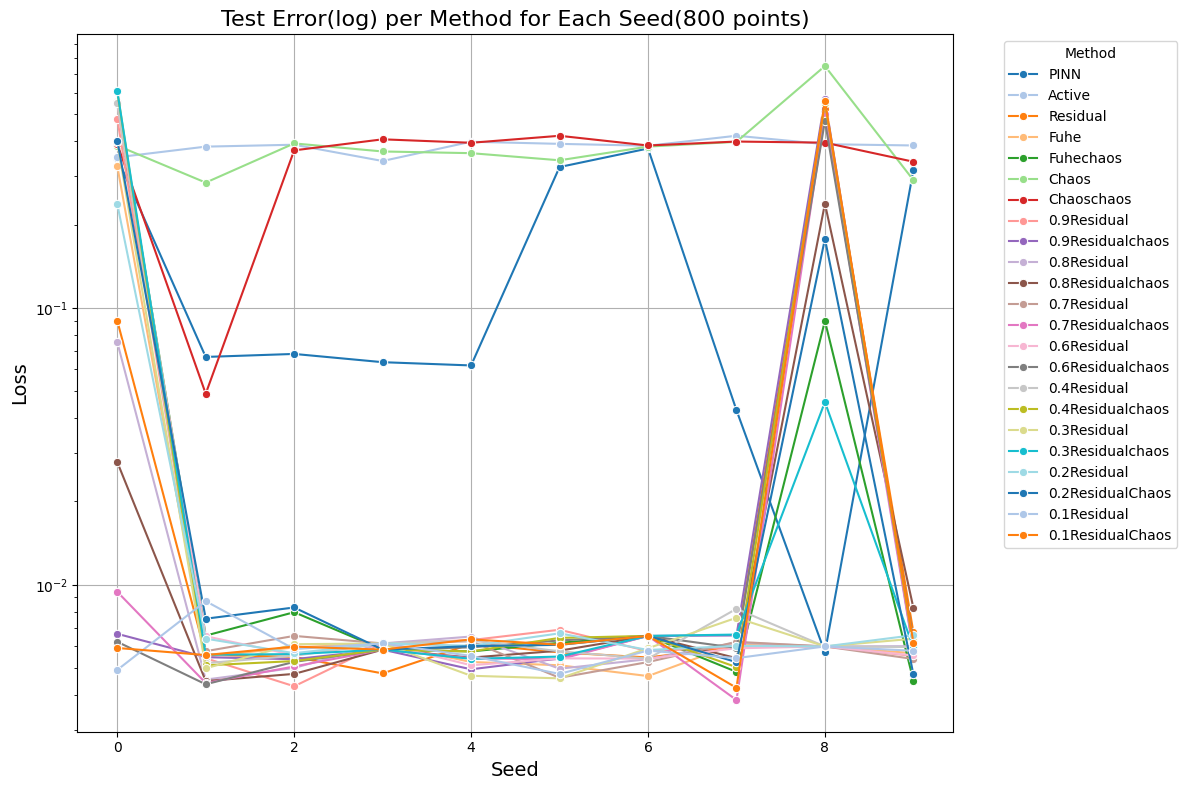

In [4]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')


# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签

plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

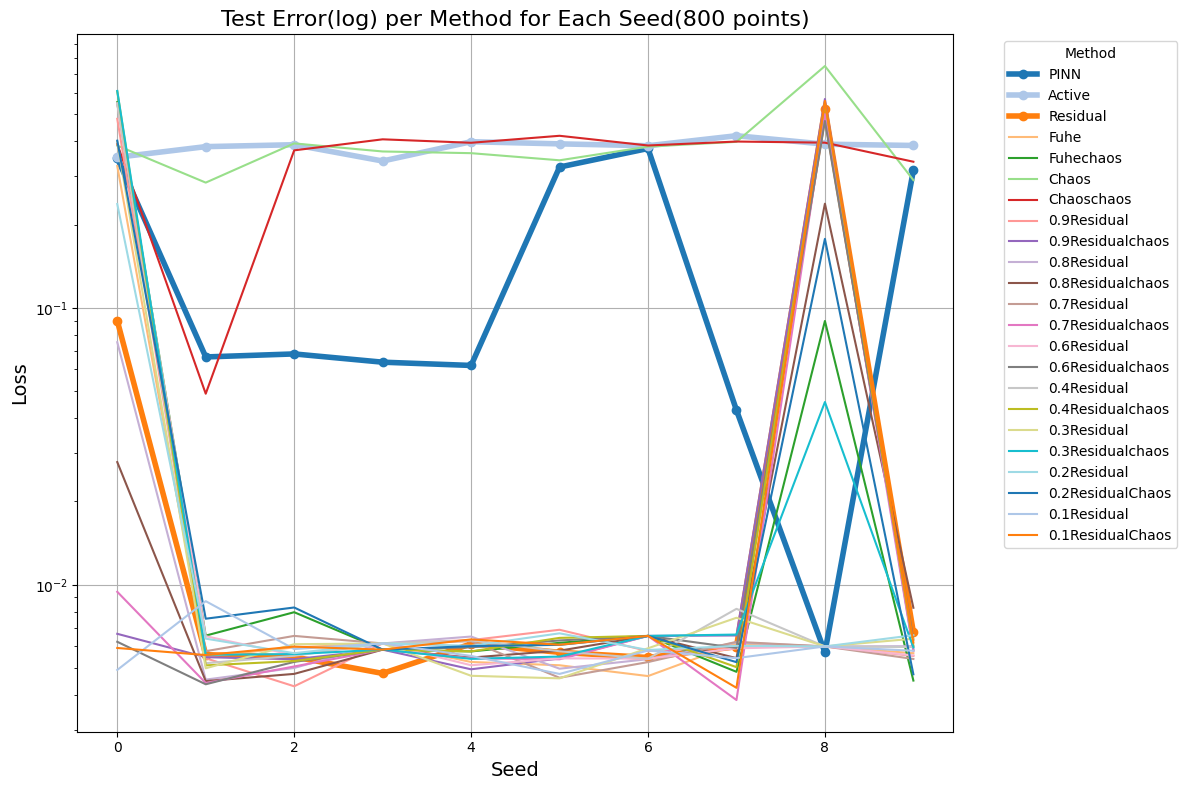

In [5]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active',"Xianxing","25000PINN","tongchengbenPINN","25000Xianxing","tongchengbenXianxing"]
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_1876\959944533.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_1876\959944533.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


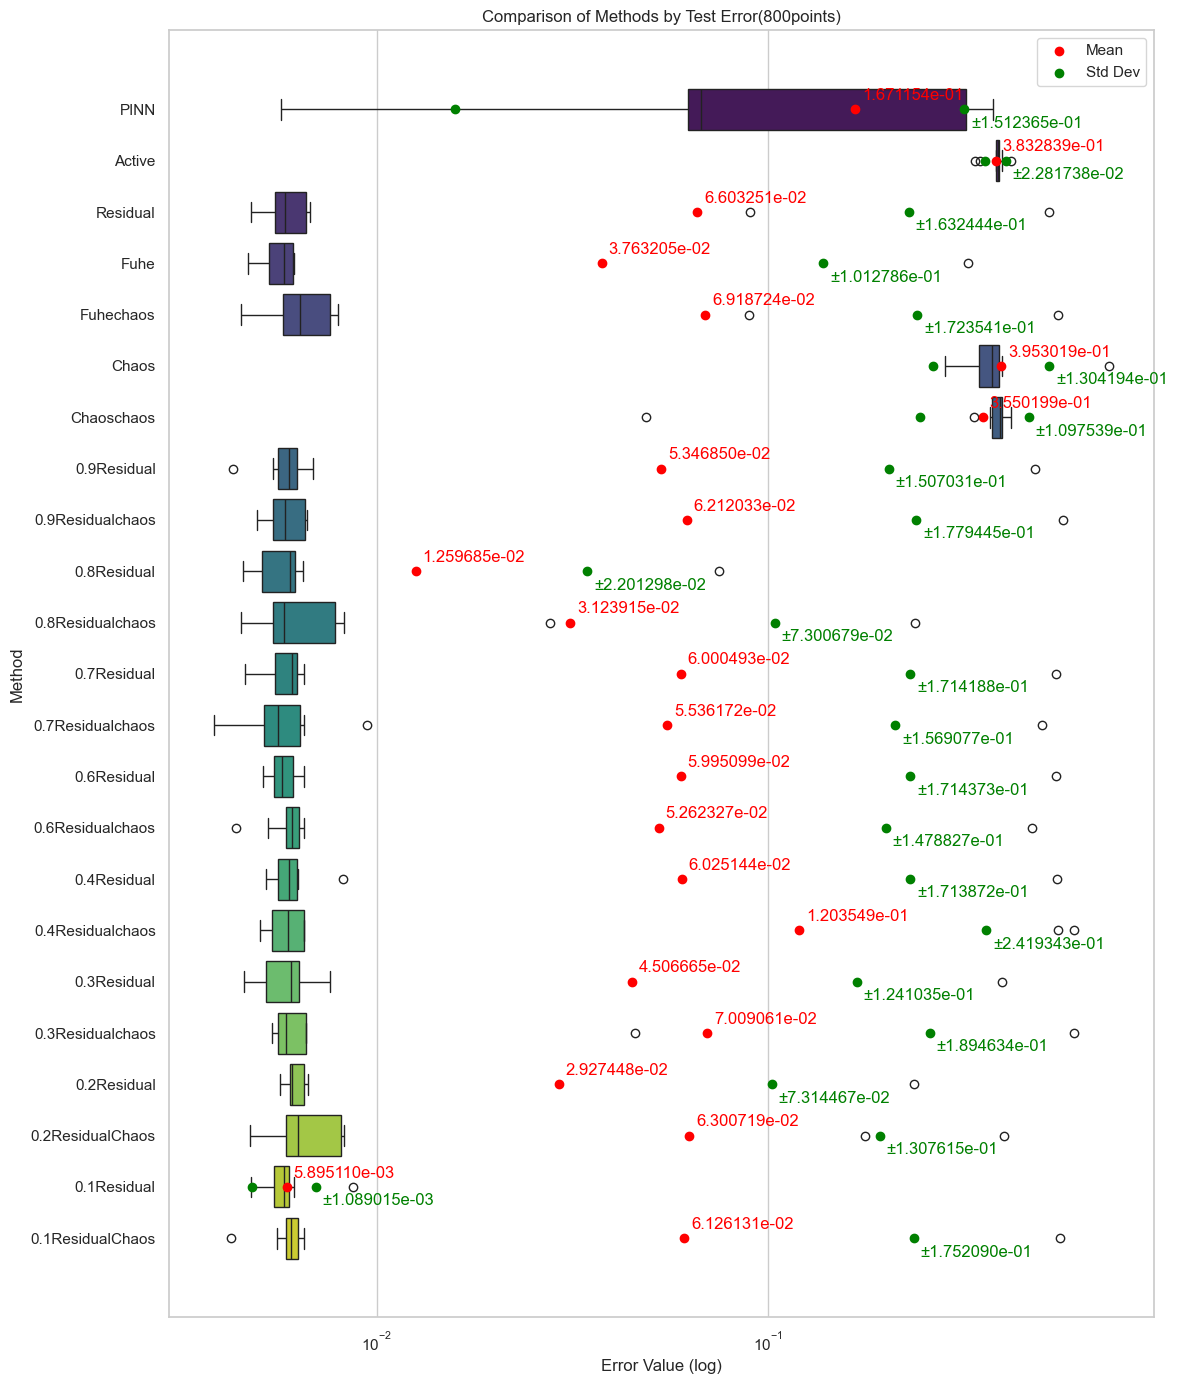

In [6]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 14))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [7]:
(1.992611e-03-2.011489e-03)/2.011489e-03

-0.009385087365628125

C:\Users\cheny\AppData\Local\Temp\ipykernel_1876\592110665.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_1876\592110665.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


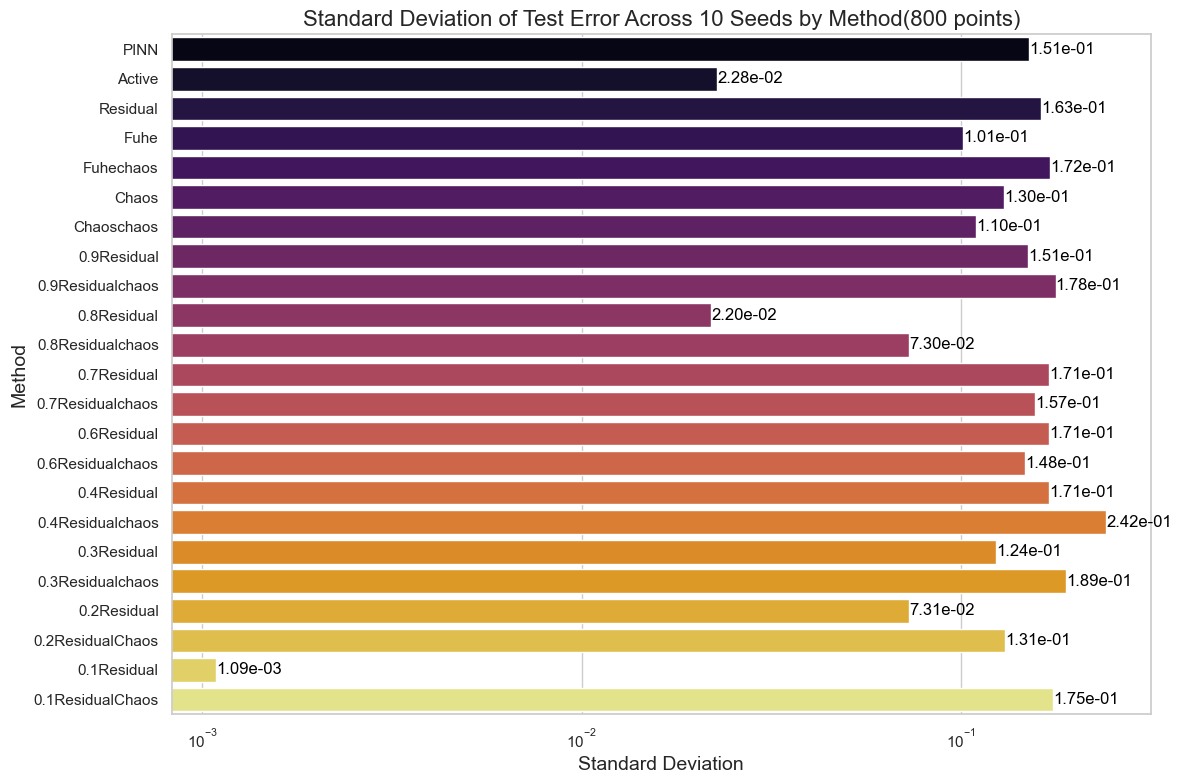

In [8]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.000001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

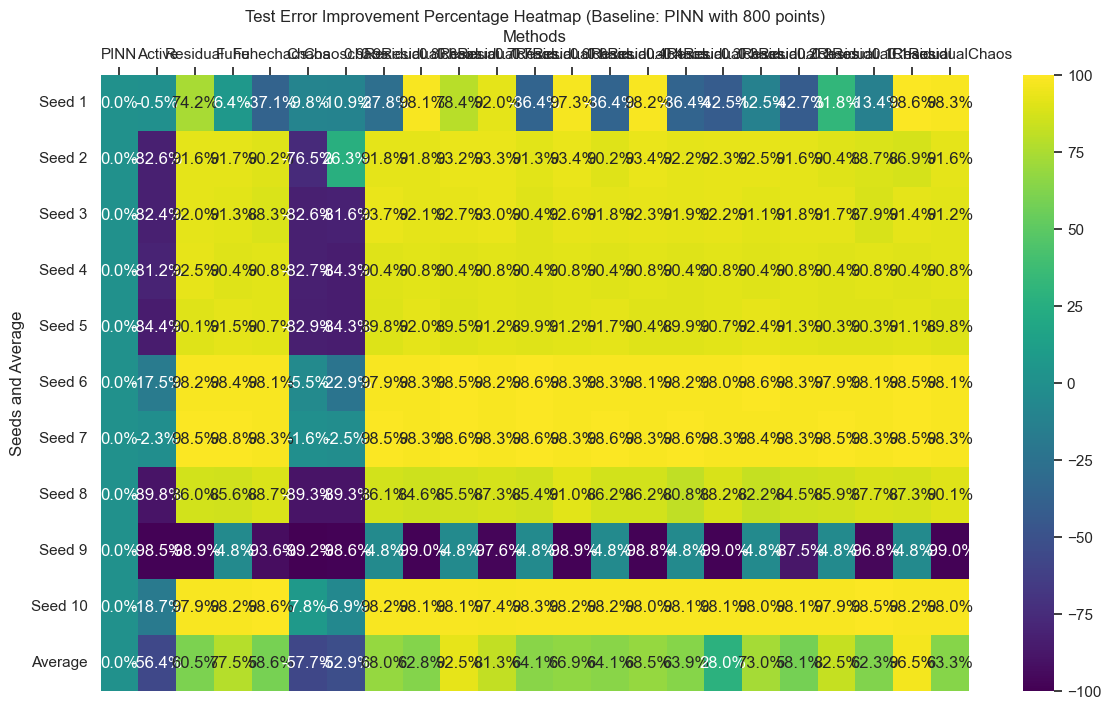

In [9]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



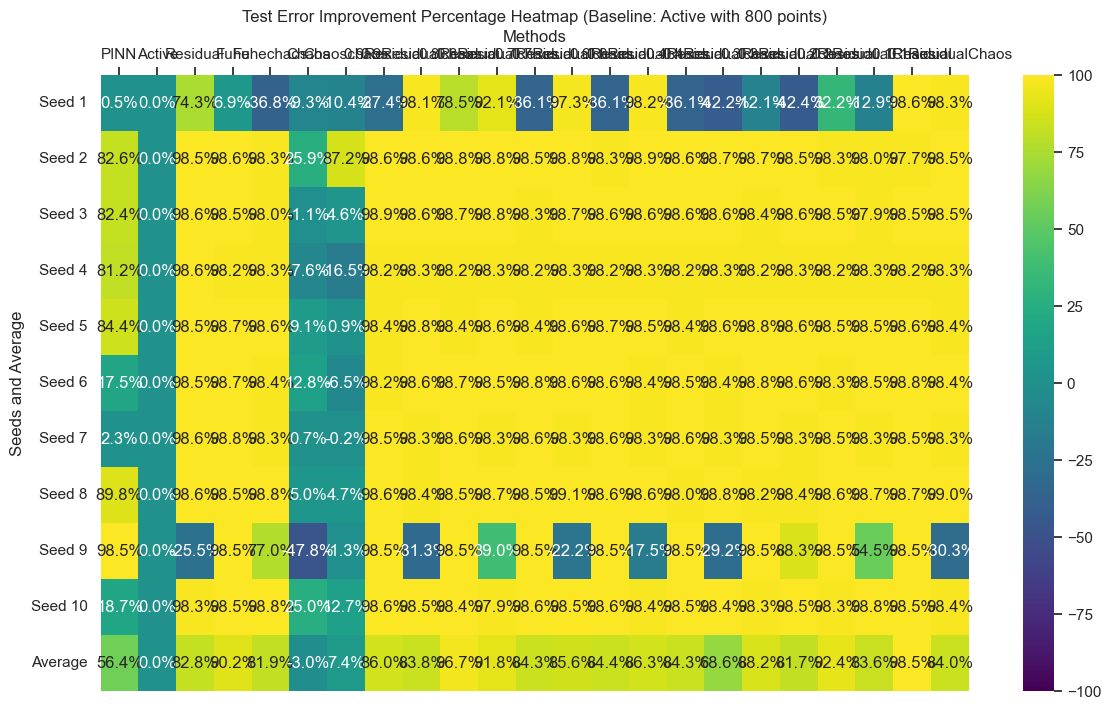

In [10]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



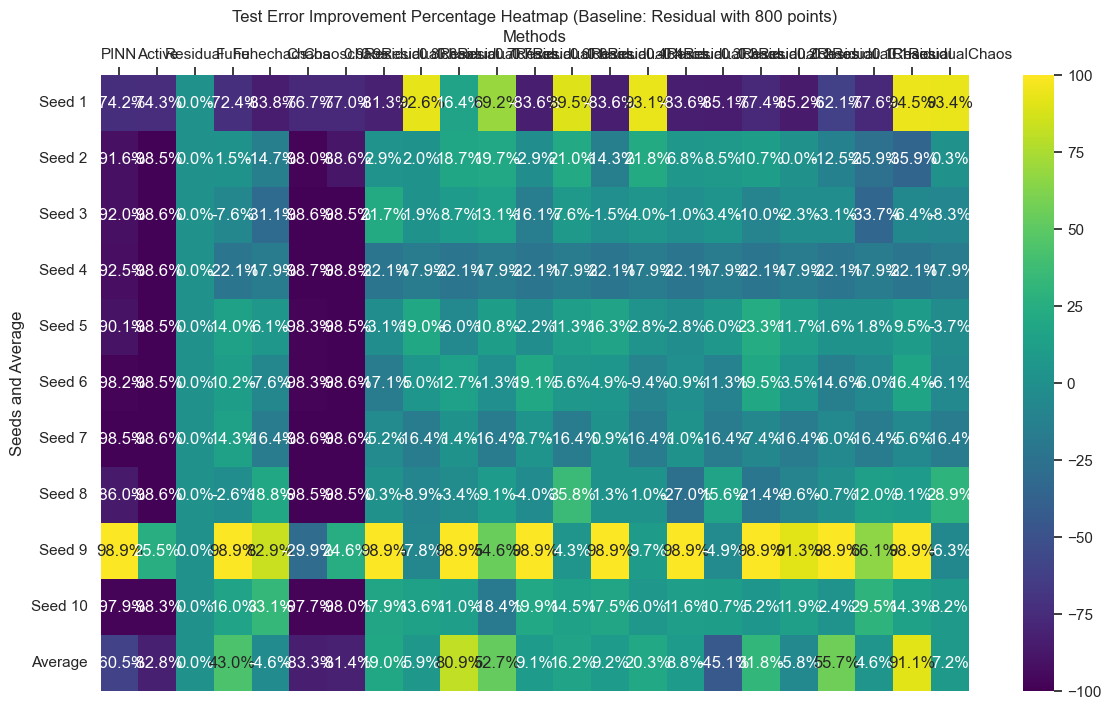

In [11]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



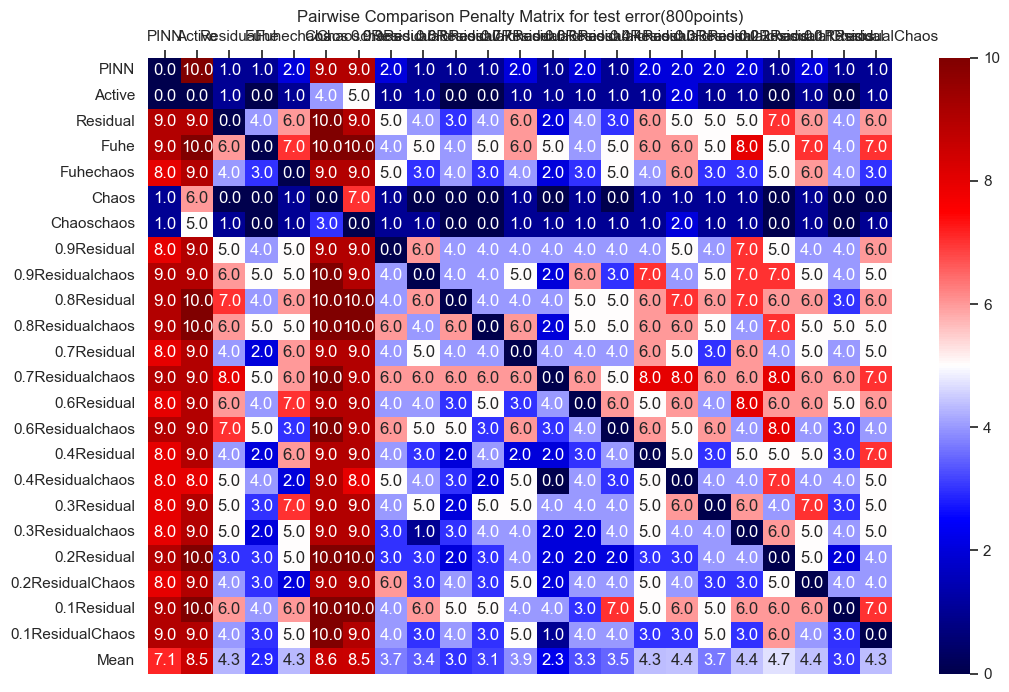

In [12]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for test error(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [13]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MAE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Active', 'Residual', 'Fuhe', 'Fuhechaos', 'Chaos', 'Chaoschaos', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualchaos', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2ResidualChaos', '0.1Residual', '0.1ResidualChaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.14482204584243175, 0.025236943440228064, 0.023875915881075224, 0.02693932320995252, 0.020194138705335037, 0.1444462413262765, 0.1618543355846889, 0.01562858658216366, 0.0033156893519249954, 0.12738558184130988], 'Active': [0.13863952864490084, 0.14854946579514375, 0.14530225546973616, 0.1281299661243419, 0.14943107397623678, 0.16811132709813215, 0.16088347940638073, 0.16482779664449992, 0.1489955157366183, 0.17210215293721012], 'Residual': [0.03940361614253336, 0.0029729445672727825, 0.003009454673870581, 0.002701805098158418, 0.0031210667018016633, 0.003256034470747703, 0.00298312839

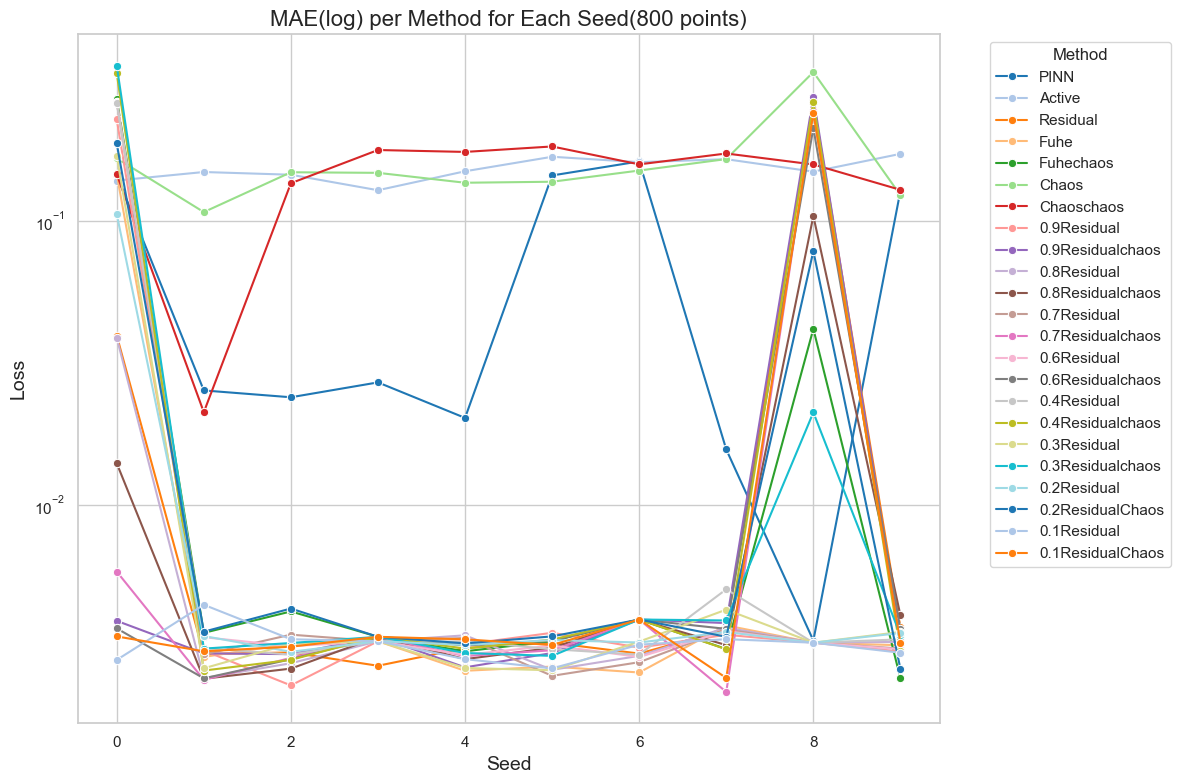

In [14]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)



# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

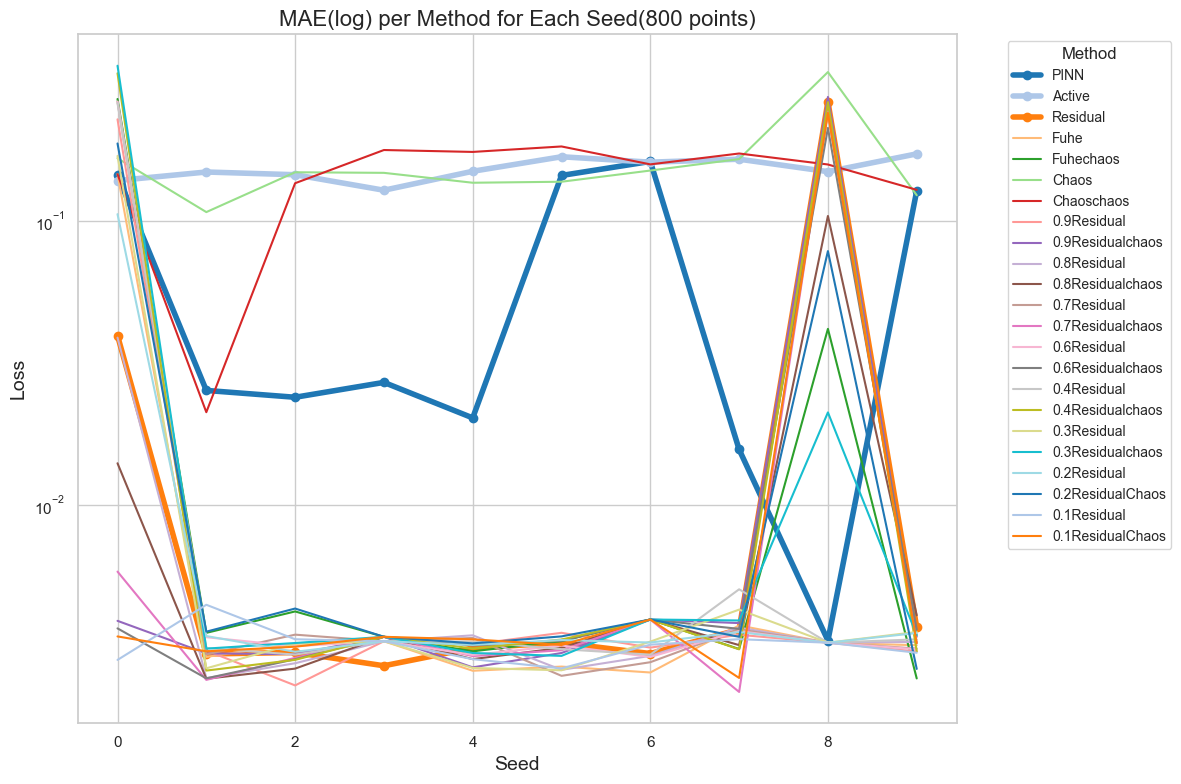

In [15]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_1876\822122591.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_1876\822122591.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


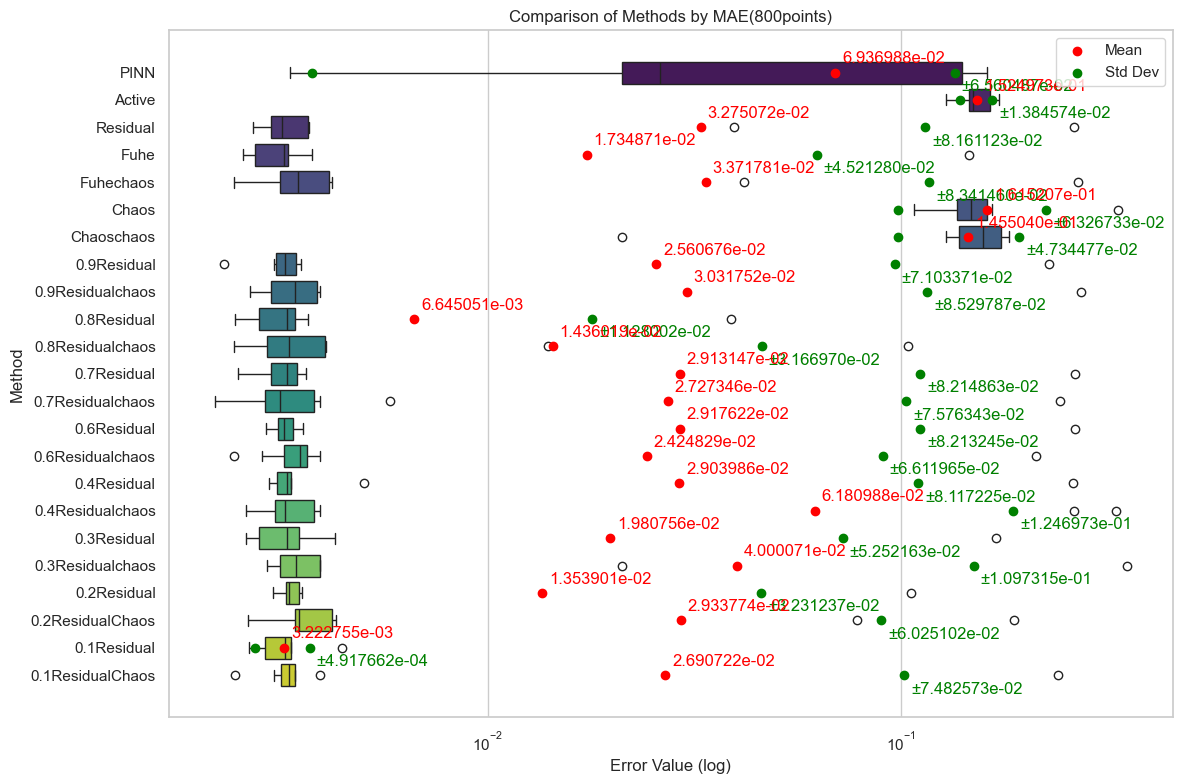

In [16]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_1876\2556958130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_1876\2556958130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


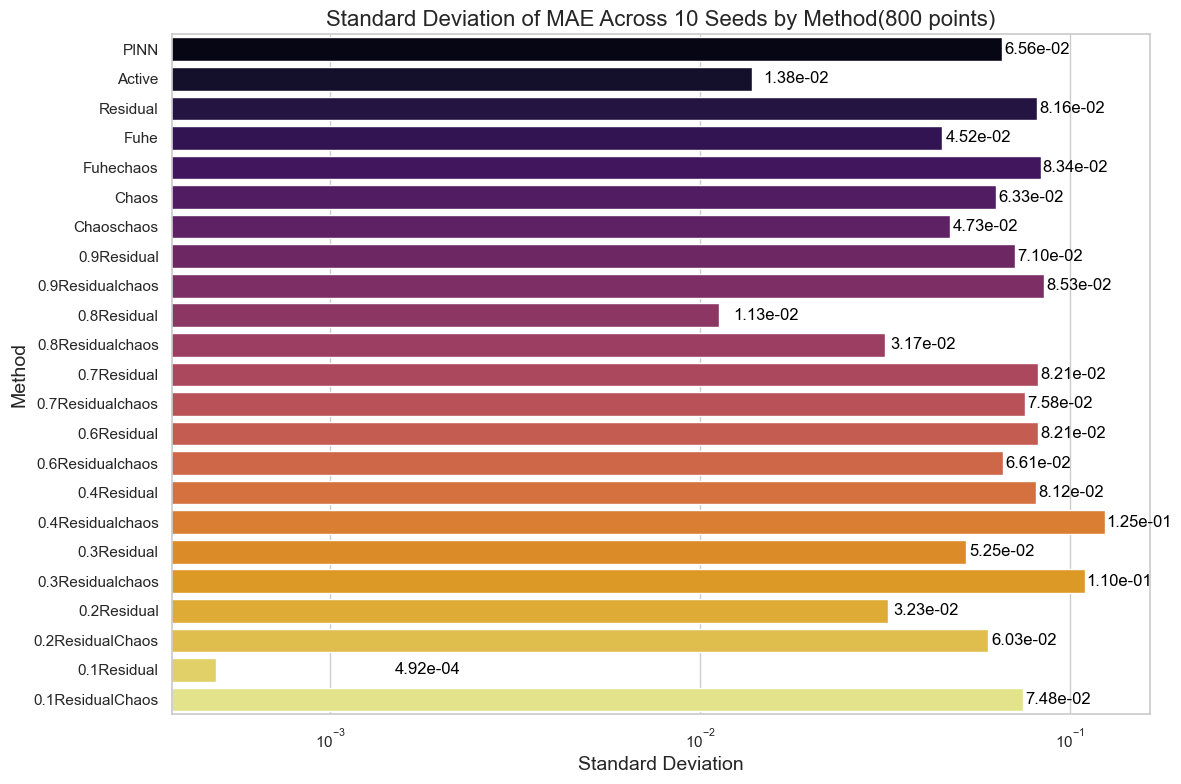

In [17]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

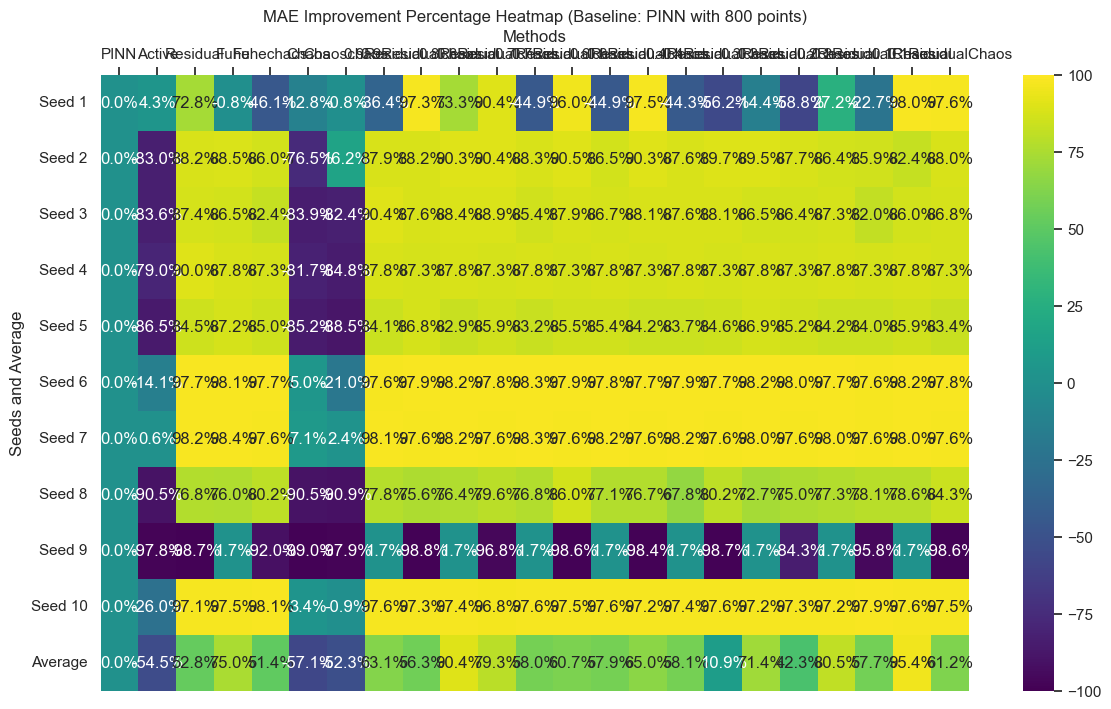

In [18]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



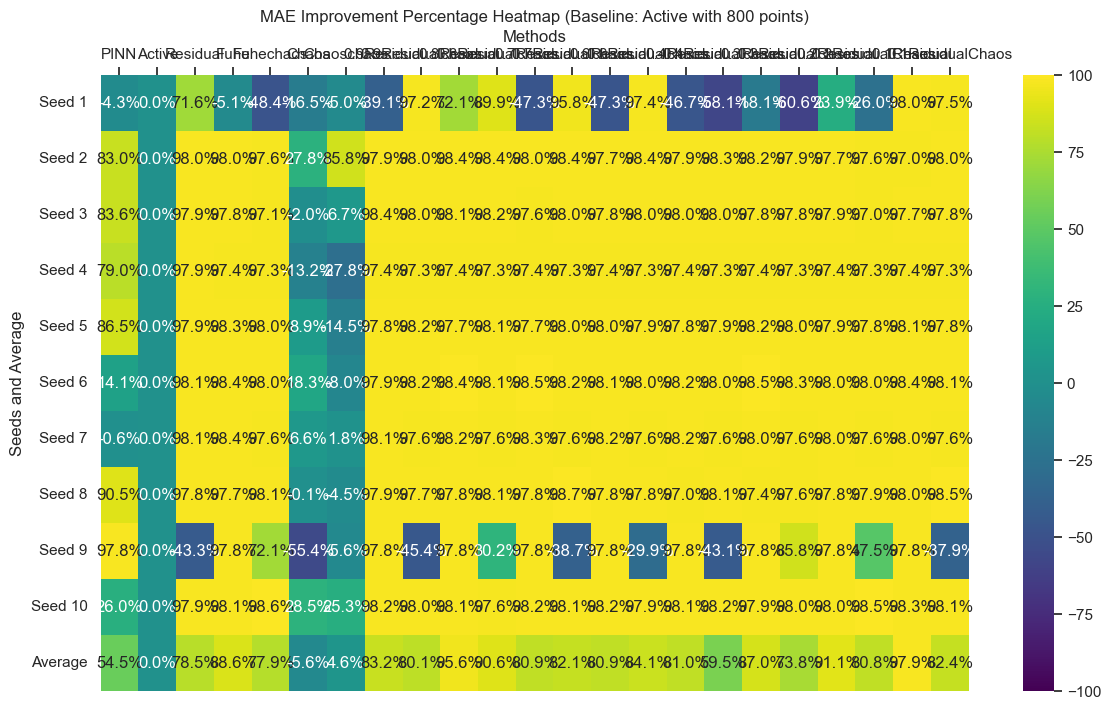

In [19]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



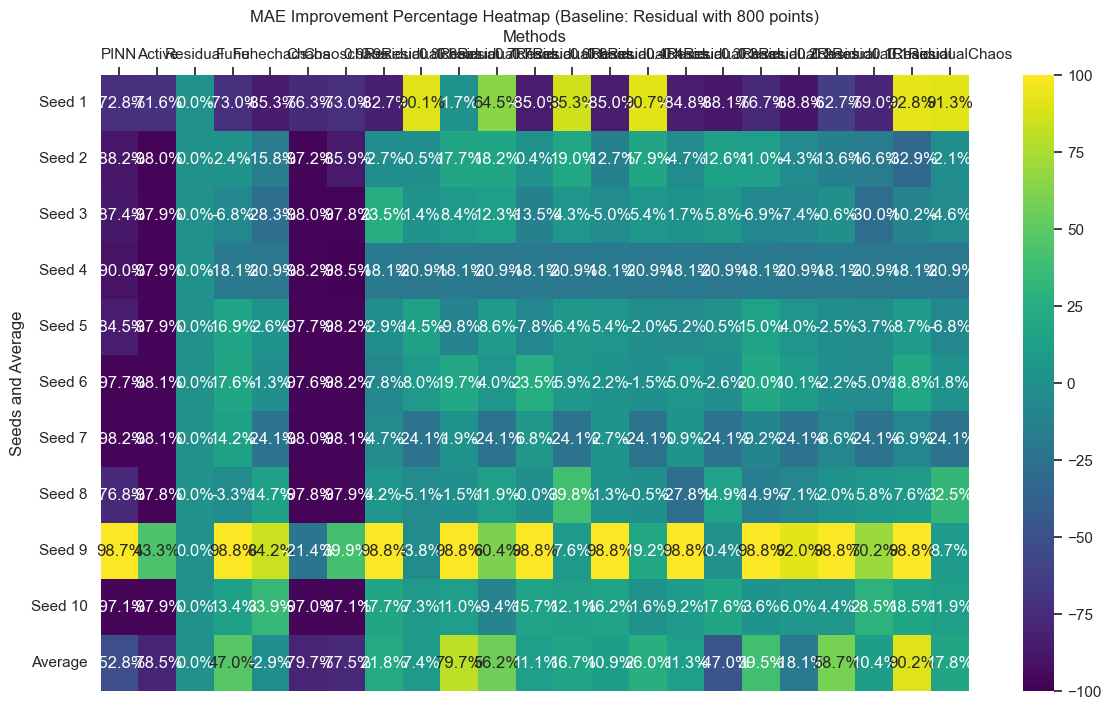

In [20]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



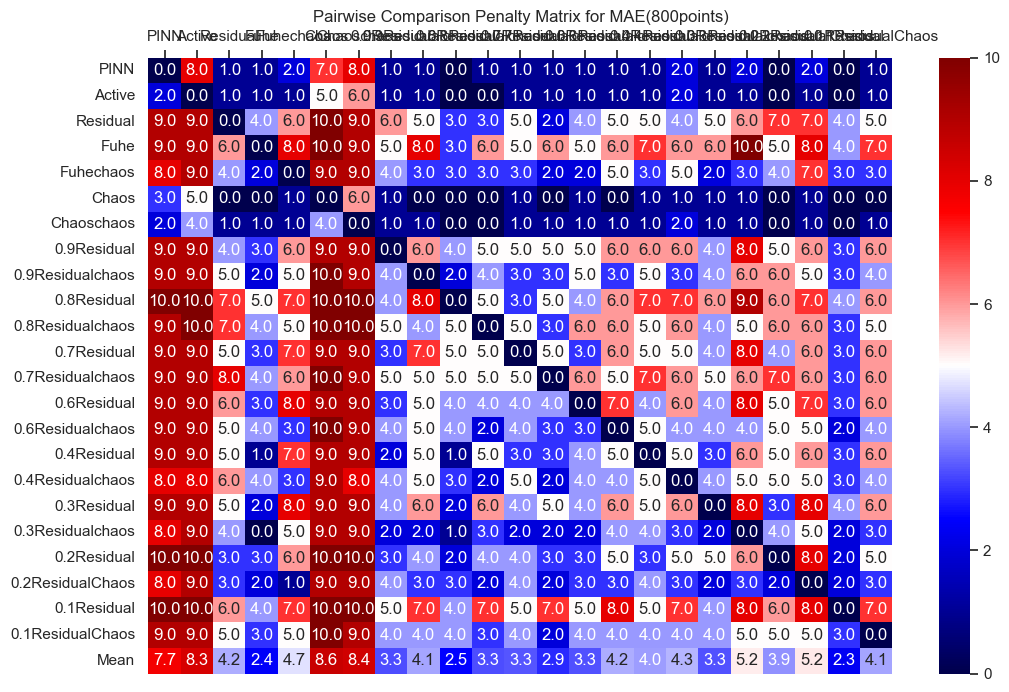

In [21]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MAE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [22]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MSE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Active', 'Residual', 'Fuhe', 'Fuhechaos', 'Chaos', 'Chaoschaos', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualchaos', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2ResidualChaos', '0.1Residual', '0.1ResidualChaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.09705432957736754, 0.003543096871902167, 0.003724523925688905, 0.0032468308516055305, 0.0030754373299206527, 0.08341862201447513, 0.11356128234609232, 0.0014617089403809935, 2.599706992089799e-05, 0.07895523225411608], 'Active': [0.09810942374770944, 0.11714389129756136, 0.12092108181421933, 0.09221243870872915, 0.12710384253252788, 0.1226653622779067, 0.11888188541370719, 0.14042963487720986, 0.1219962907568776, 0.11942993311529812], 'Residual': [0.006475752942790921, 2.5013522566529493e-05, 2.4098095280139242e-05, 1.8322634832186085e-05, 2.9934773770660286e-05, 2.602846140460807e-05

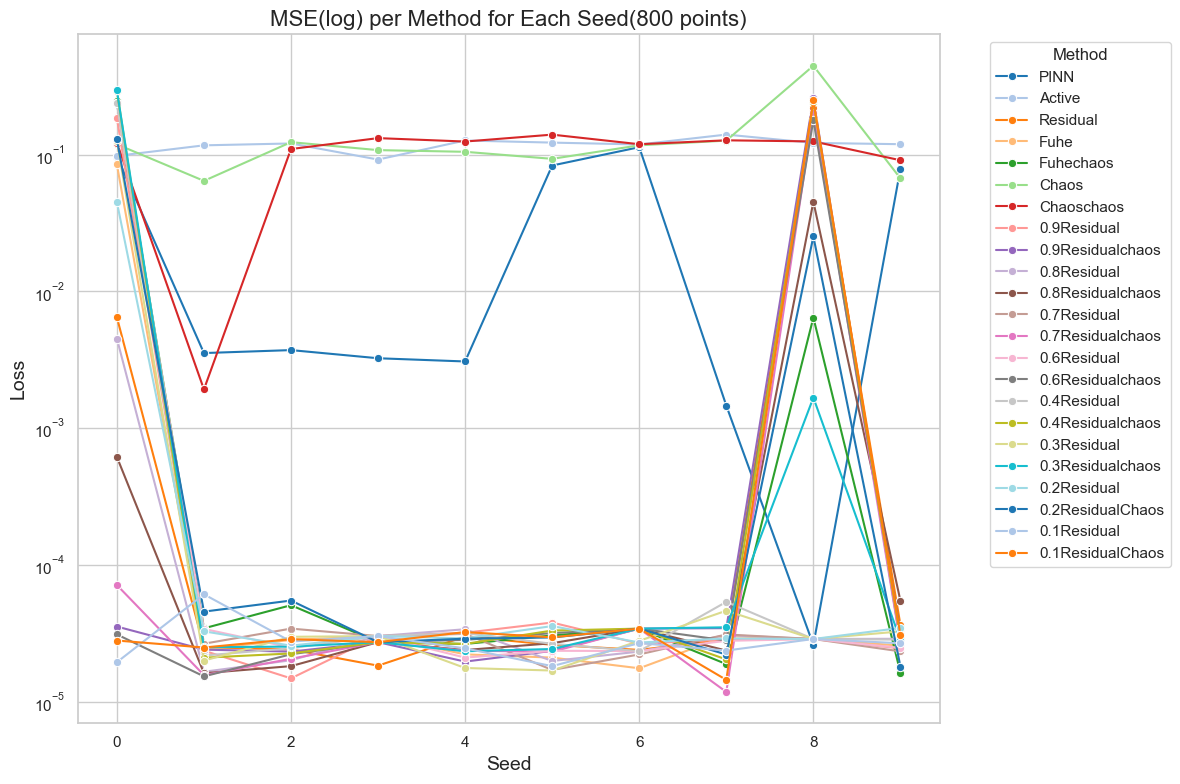

In [23]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')



# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

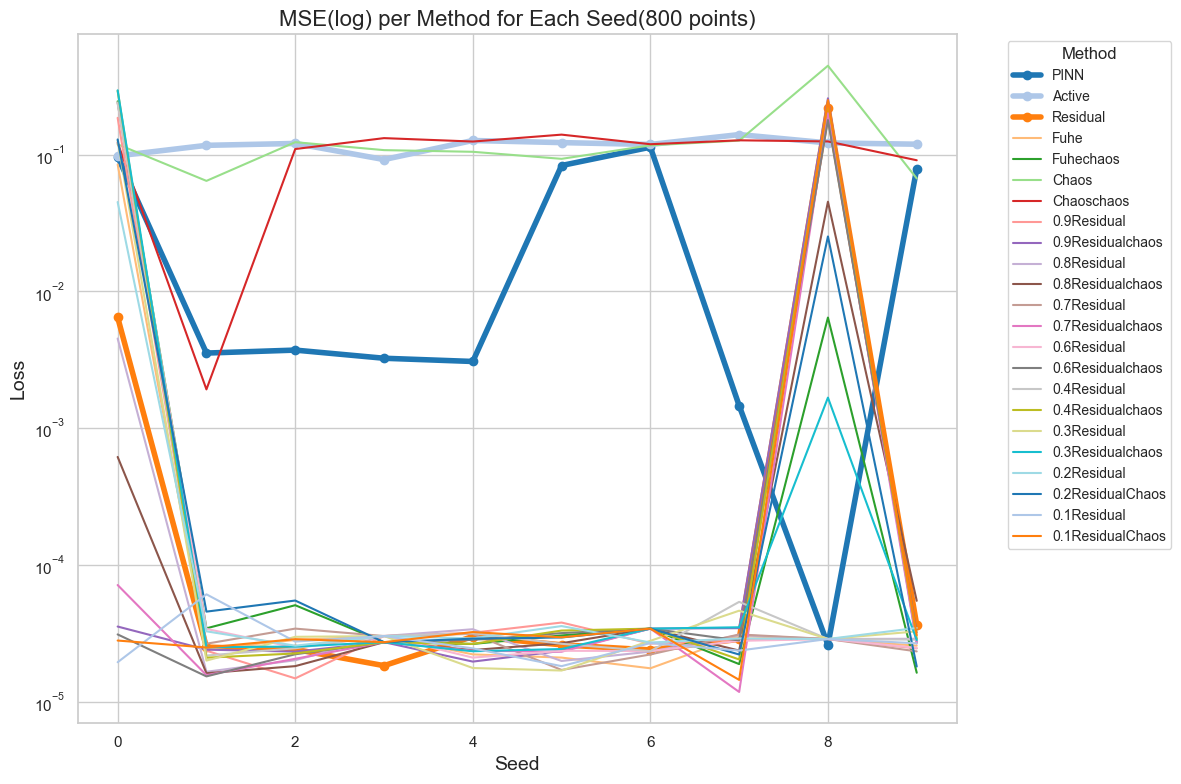

In [24]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_1876\2163168095.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_1876\2163168095.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


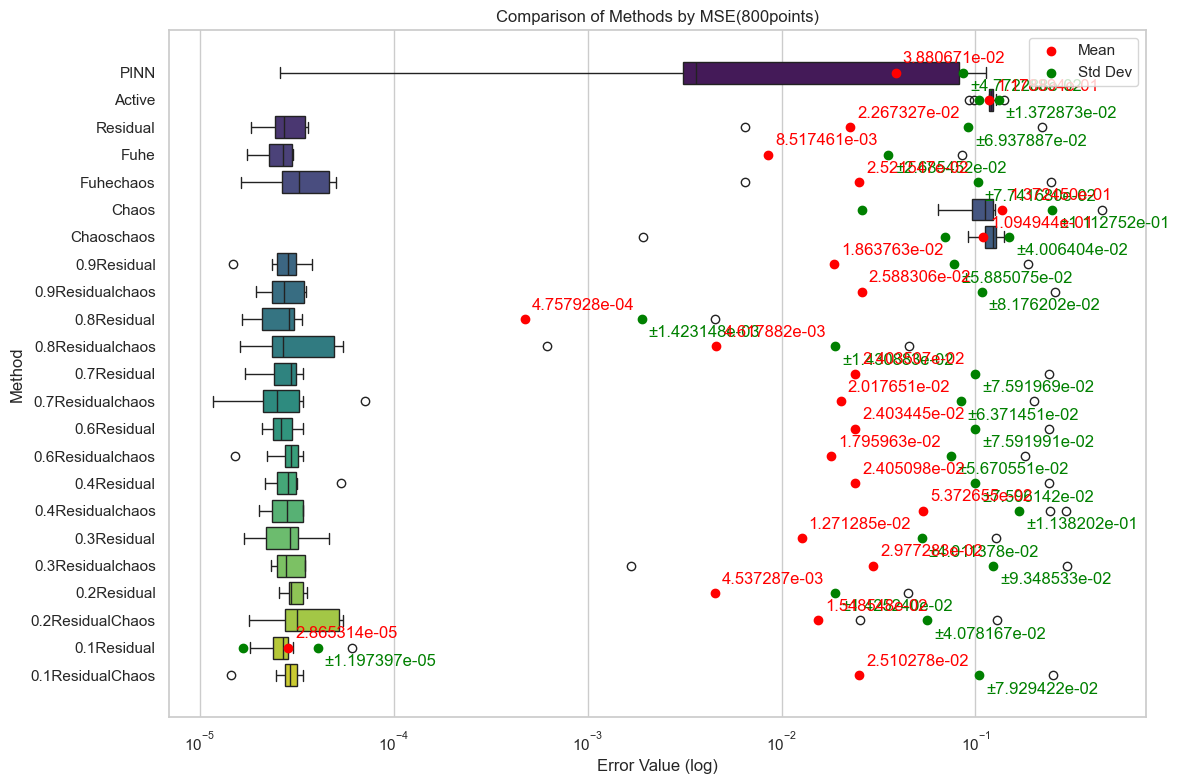

In [25]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [26]:
def rmse_to_mse(rmse):
    """
    将 RMSE 转换为 MSE。
    
    参数:
        rmse (float 或 list 或 numpy array): 均方根误差值
    
    返回:
        mse: 对应的均方误差值
    """
    import numpy as np
    rmse = np.array(rmse)
    mse = rmse ** 2
    return mse

rmse_to_mse(0.0003632)
rmse_to_mse([0.0003632, 0.0131793])

array([1.31914240e-07, 1.73693948e-04])

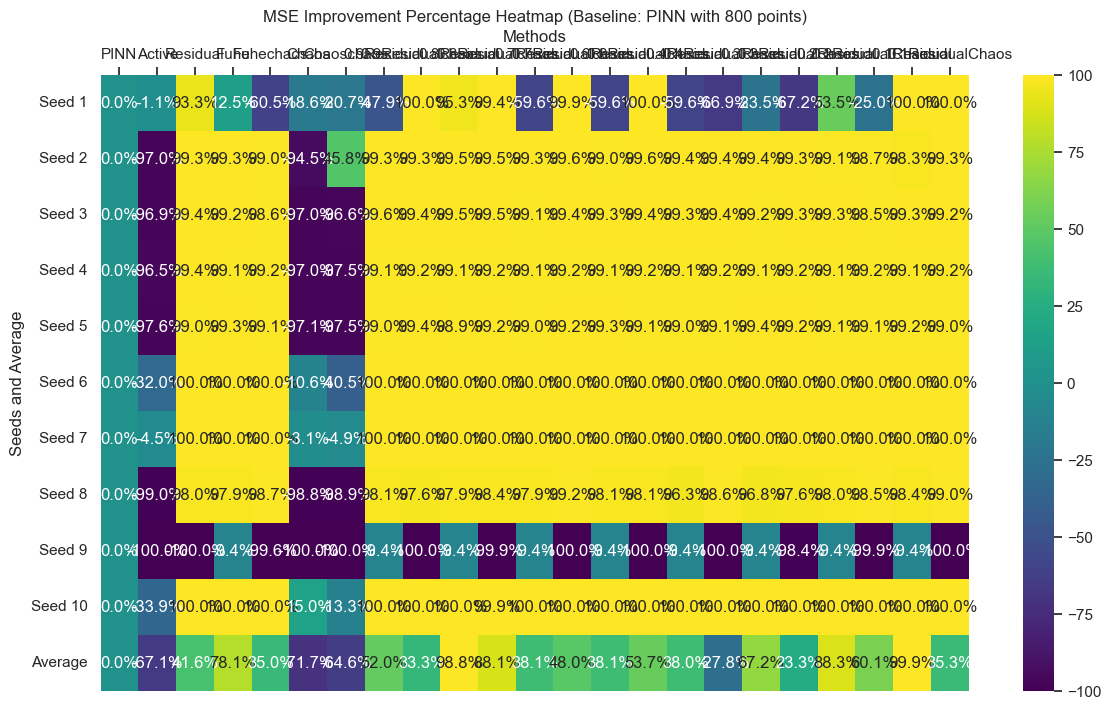

In [27]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



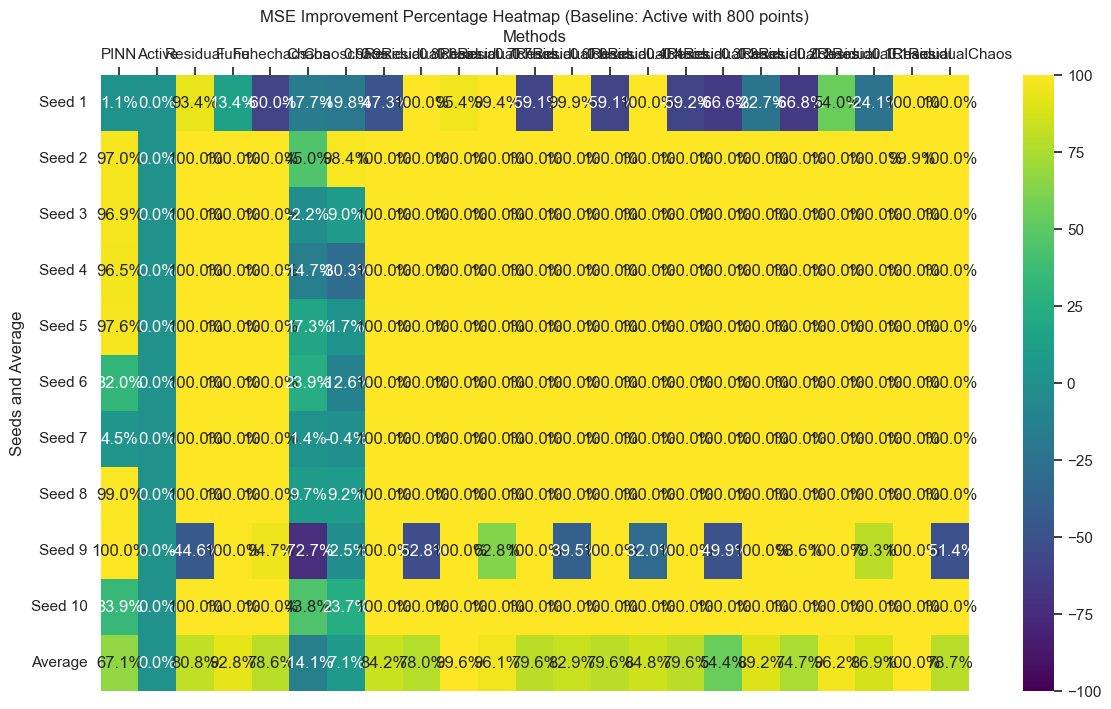

In [28]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



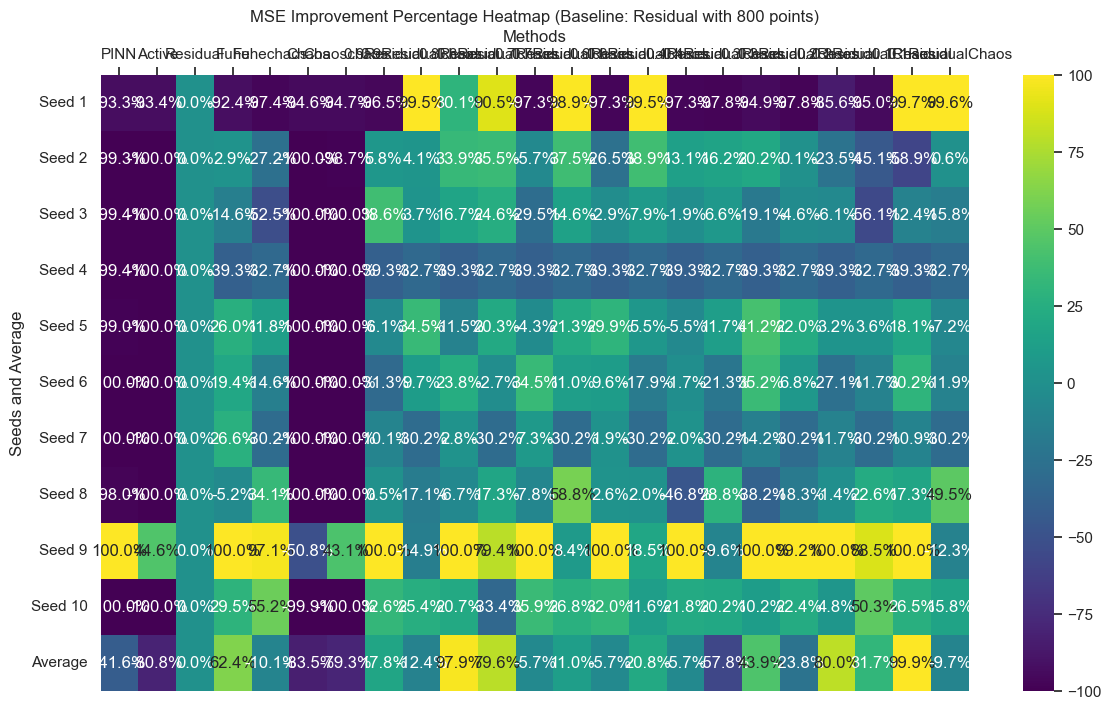

In [29]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



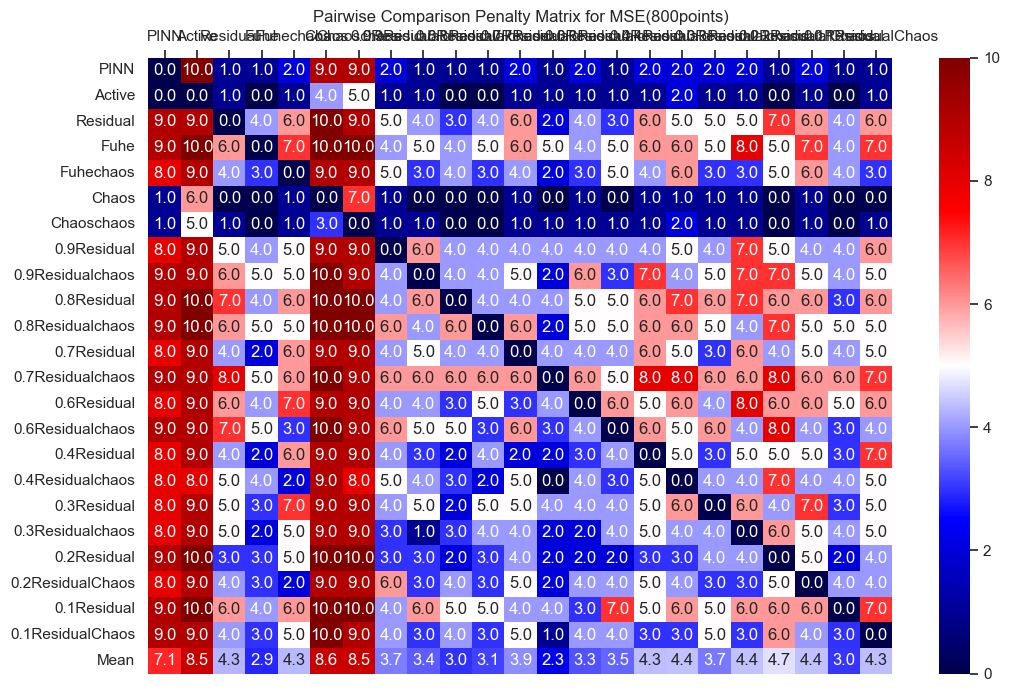

In [30]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MSE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [31]:
np.sqrt(2.889226e-06)

0.0016997723376970223